In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

In [ ]:
df = pd.read_csv('gender_classification.csv')

In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [ ]:
df.duplicated().sum()

1768

The command `df.duplicated().sum()` is used to count the total number of duplicate rows in a DataFrame.

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(3233, 8)

The command `df.drop_duplicates(inplace=True)` removes duplicate rows from the DataFrame, and `df.shape` is then used to check the dimensions (number of rows and columns) of the DataFrame after the duplicates are removed.

In [ ]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.sample(5).T

,1287,836,1872,3586,790
long_hair,1,1,1,1,1
forehead_width_cm,11.9,13.5,13.3,15.1,13.5
forehead_height_cm,6.8,5.9,5.5,6.6,6.4
nose_wide,1,0,1,1,1
nose_long,1,1,1,1,0
lips_thin,0,0,0,1,1
distance_nose_to_lip_long,1,0,1,0,0
gender,Male,Female,Male,Male,Female


Here The .T attribute transposes the DataFrame, which means it swaps the rows and columns.
After transposing, what were originally rows become columns, and what were originally columns become rows.

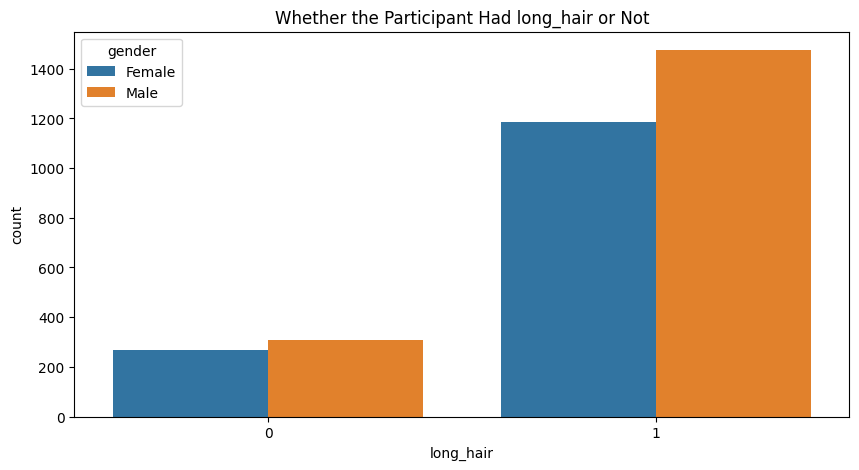

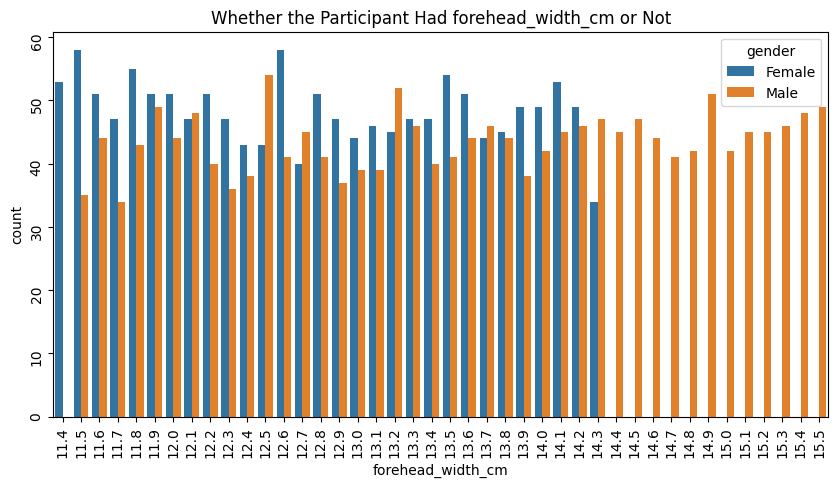

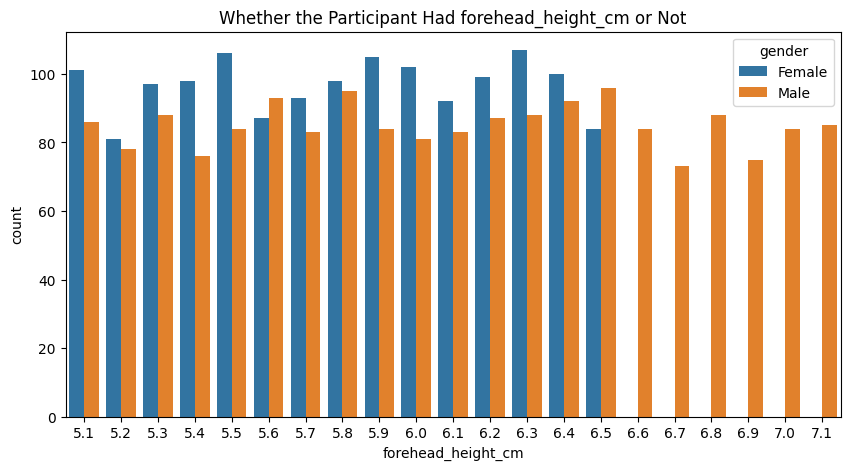

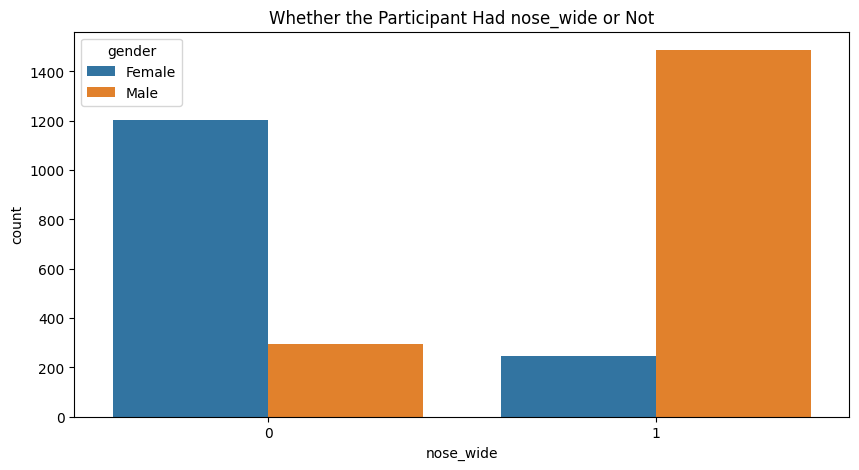

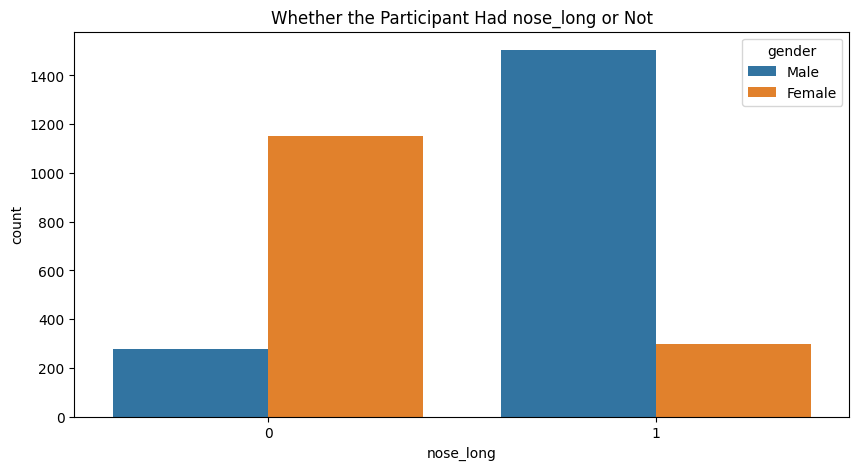

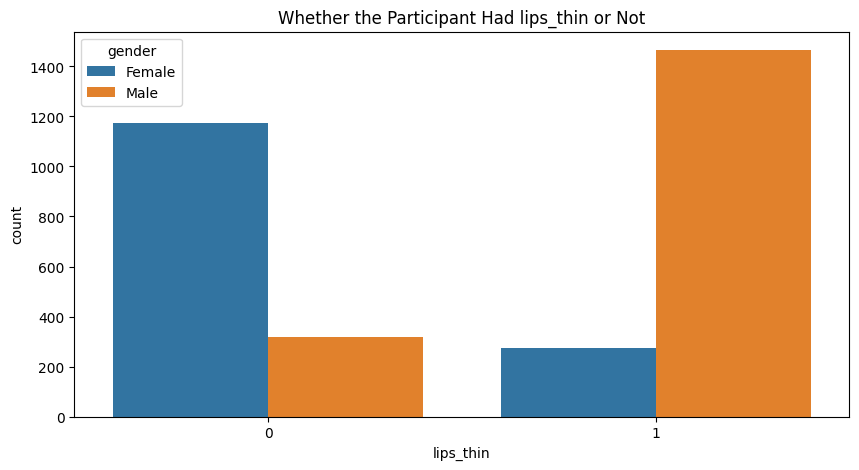

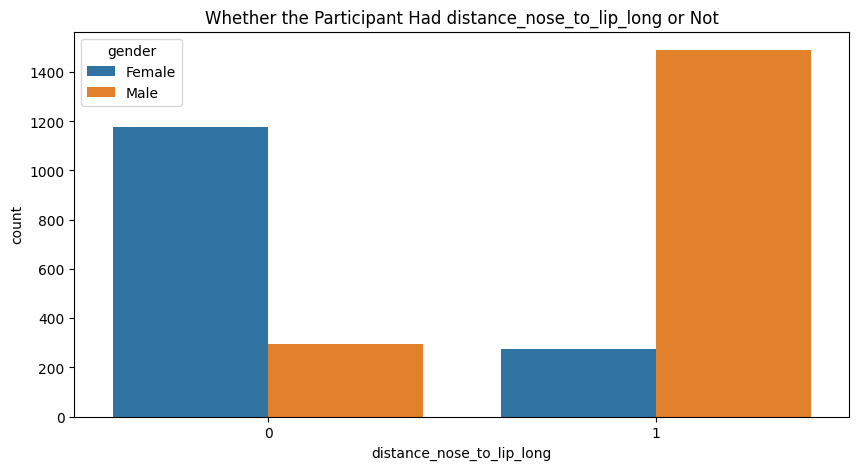

In [ ]:
for i in df:
    if i =='gender':
      break
    if i =='forehead_height_cm':
        plt.tick_params(rotation=90)
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[i], hue=df['gender'])
    plt.title(f"Whether the Participant Had {i} or Not")

Here the (i) is defined as the total columns till the gender columns comes

The condition goes on plotting the graph untill the column 'gender' comes and then stops

The comparison can be seen between men and women according to the attributes present in the dataset.

In [ ]:
x = df[df.columns[:-1]]
y = df['gender']
le=LabelEncoder()
y = le.fit_transform(y)

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4986      Male
4990    Female
4992      Male
4993    Female
4995      Male
Name: gender, Length: 3233, dtype: object


The code selects all columns except the last one for features (`x`), extracts the 'gender' column as the target (`y`), and encodes the 'gender' values into numerical labels.

In [ ]:
scaler = MinMaxScaler()
columns = x.columns
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = columns
x.head()
print(y)

[1 0 1 ... 1 0 1]


The code scales the feature values in `x` to a range of [0, 1] using `MinMaxScaler`, reassigns the original column names, and prints the encoded target values `y`.

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42 )

splitting the dataset into 80/20 format

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

[0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 1 0 0 1 1 

Text(0.5, 1.0, 'Logistic Regresstion Confusion Matrix')

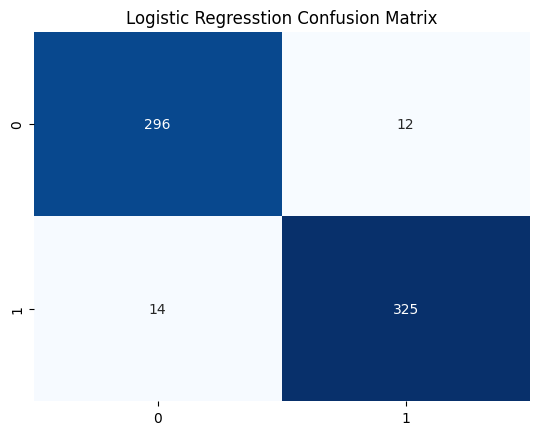

In [ ]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(x_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print(y_pred)
print('Accuracy = ' , lr_test_acc,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix')

For detailed explaination pls refer the docx attached with this.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy =  94.44  %
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       308
           1       0.96      0.93      0.95       339

    accuracy                           0.94       647
   macro avg       0.94      0.95      0.94       647
weighted avg       0.95      0.94      0.94       647




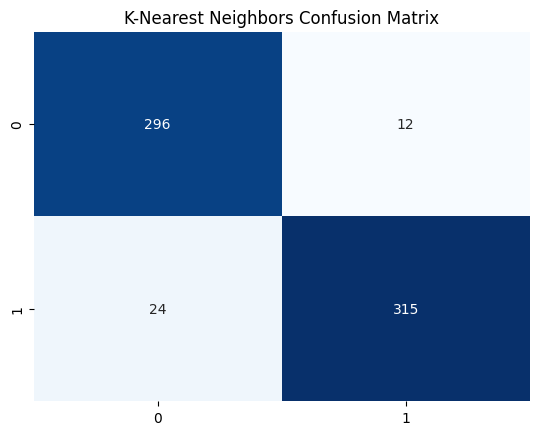

In [ ]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
knn_train_acc = round(accuracy_score(y_train,knn.predict(x_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , knn_test_acc,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix');

For detailed explaination pls refer the docx attached with this.

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy =  94.44  %
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       308
           1       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647




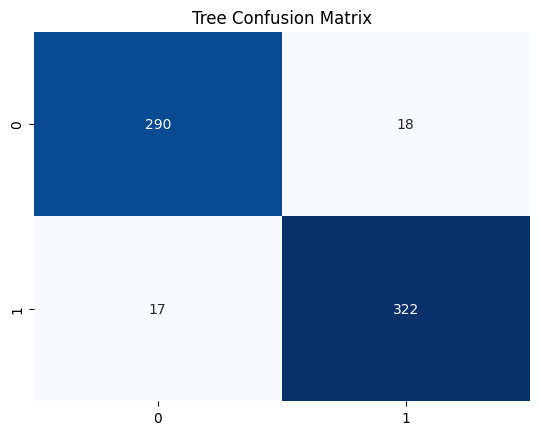

In [ ]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
model_train_acc = round(accuracy_score(y_train,model.predict(x_train))*100,2)
model_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , knn_test_acc,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Tree Confusion Matrix');

For detailed explaination pls refer the docx attached with this.

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','tree'
    ],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,model_train_acc
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,model_test_acc
    ]
})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
2,tree,99.77,94.59
1,K Nearest Neighbors,96.98,94.44
0,Logistic Regression,95.09,95.98


In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(cmap='coolwarm')

,Model,Training Accuracy,Model Accuracy Score
0,Logistic Regression,95.090000,95.980000
2,tree,99.770000,94.590000
1,K Nearest Neighbors,96.980000,94.440000


this shows the accuracy points difference of each different models

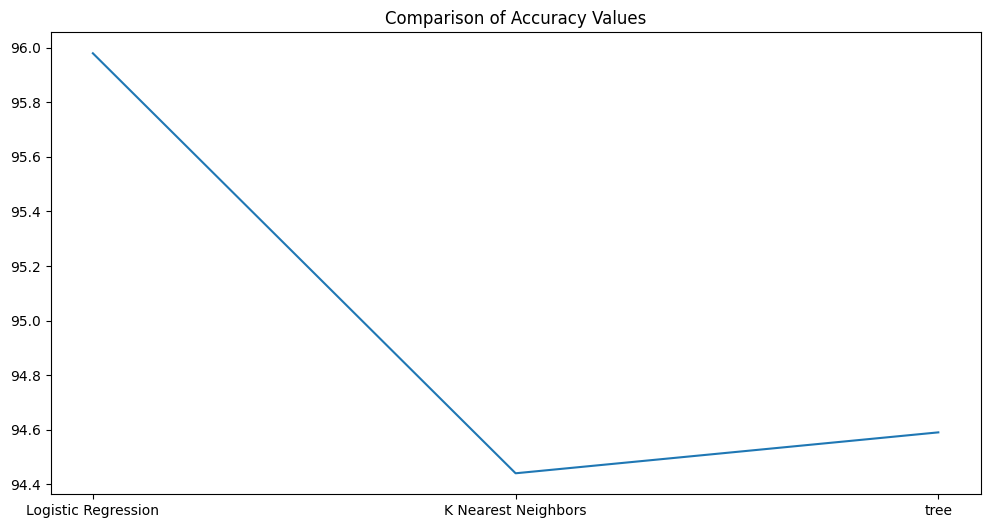

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(models['Model'] , models['Model Accuracy Score'])

plt.title("Comparison of Accuracy Values")

plt.show()

In [ ]:
print(f'\n\nAccuracy of KNN: {knn_test_acc:.2f}\n')
print(f'Accuracy of Logistic Regression: {lr_test_acc:.2f}\n')
print(f'Accuracy of tree: {model_test_acc:.2f}\n')

if(lr_test_acc > knn_test_acc and lr_test_acc > model_test_acc):
  print('Accuracy of Logistic Regression is good than KNN and tree')
elif (lr_test_acc < knn_test_acc and knn_test_acc > model_test_acc) :
  print('Accuracy of KNN is good than Logistic Regression and tree\n')
else:
  print('Accuracy of tree is good than Logistic Regression and Knn\n')




Accuracy of KNN: 94.44

Accuracy of Logistic Regression: 95.98

Accuracy of tree: 94.59

Accuracy of Logistic Regression is good than KNN and tree
